#  

In [1]:
## Simple neural network example.
## So far this should all look very familiar.
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [2]:
model = Sequential([
    Dense(units=500, activation='relu', input_shape=(image_size,)),
    
    Dense(units=400, activation='relu'),
    BatchNormalization(),
    
    Dense(units=300, activation='relu'),
    BatchNormalization(),
    
    Dense(units=200, activation='relu'),
    BatchNormalization(),
    
    Dense(units=100, activation='relu'),
    Dropout(rate=.3),
    BatchNormalization(),

    
    Dense(units=50, activation='relu'),
    Dropout(rate=.2),
    BatchNormalization(),
    
    Dense(units=25, activation='relu'),
    Dropout(rate=.1),
    BatchNormalization(),
    
    
    Dense(units=num_classes, activation='softmax')
])

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Note: No validation data. In a go-to-production setting, you'd already be confident this model will generalize
# so there's no point in validating it. Instead, use all the available data to train!
early_stopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(training_data, training_labels, batch_size=128, epochs=50, validation_split=0.2, verbose=True, callbacks=[early_stopper]) 

2023-03-01 17:23:09.562328: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
375/375 [==============================] - 7s 15ms/step - loss: 0.5358 - accuracy: 0.8604 - val_loss: 0.2600 - val_accuracy: 0.9249
Epoch 2/50
375/375 [==============================] - 5s 13ms/step - loss: 0.2157 - accuracy: 0.9468 - val_loss: 0.1899 - val_accuracy: 0.9512
Epoch 3/50
375/375 [==============================] - 6s 15ms/step - loss: 0.1535 - accuracy: 0.9614 - val_loss: 0.1441 - val_accuracy: 0.9673
Epoch 4/50
375/375 [==============================] - 5s 14ms/step - loss: 0.1190 - accuracy: 0.9707 - val_loss: 0.1307 - val_accuracy: 0.9653
Epoch 5/50
375/375 [==============================] - 5s 14ms/step - loss: 0.1065 - accuracy: 0.9733 - val_loss: 0.1418 - val_accuracy: 0.9677
Epoch 6/50
375/375 [==============================] - 5s 14ms/step - loss: 0.0945 - accuracy: 0.9769 - val_loss: 0.1213 - val_accuracy: 0.9706
Epoch 7/50
375/375 [==============================] - 5s 13ms/step - loss: 0.0851 - accuracy: 0.9786 - val_loss: 0.1217 - val_accuracy: 0.9710

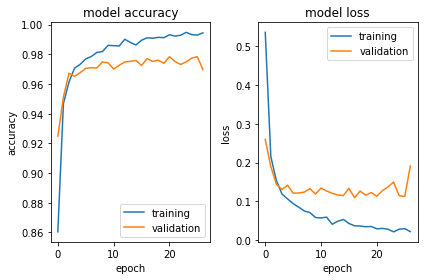

Test loss: 0.0904
Test accuracy: 0.979


In [4]:
from matplotlib import pyplot as plt

figure = plt.figure()

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.tight_layout()

figure.tight_layout()
plt.tight_layout()
plt.show()

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [6]:
model = Sequential([
    Dense(units=500, activation='relu', input_shape=(image_size,)),
    
    Dense(units=400, activation='relu'),
    BatchNormalization(),
    
    Dense(units=300, activation='relu'),
    BatchNormalization(),
    
    Dense(units=200, activation='relu'),
    BatchNormalization(),
    
    Dense(units=100, activation='relu'),
    Dropout(rate=.3),
    BatchNormalization(),

    
    Dense(units=50, activation='relu'),
    Dropout(rate=.2),
    BatchNormalization(),
    
    Dense(units=25, activation='relu'),
    Dropout(rate=.1),
    BatchNormalization(),
    
    
    Dense(units=num_classes, activation='softmax')
])

# The only difference between the two experiments is the loss function!
model.compile(optimizer="adam", loss='kullback_leibler_divergence', metrics=['accuracy'])

# Note: No validation data. In a go-to-production setting, you'd already be confident this model will generalize
# so there's no point in validating it. Instead, use all the available data to train!
early_stopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(training_data, training_labels, batch_size=128, epochs=50, validation_split=0.2, verbose=True, callbacks=[early_stopper]) 

Epoch 1/50
375/375 [==============================] - 6s 11ms/step - loss: 0.5618 - accuracy: 0.8539 - val_loss: 0.3172 - val_accuracy: 0.9062
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 0.2232 - accuracy: 0.9444 - val_loss: 0.2665 - val_accuracy: 0.9272
Epoch 3/50
375/375 [==============================] - 4s 10ms/step - loss: 0.1719 - accuracy: 0.9561 - val_loss: 0.1393 - val_accuracy: 0.9604
Epoch 4/50
375/375 [==============================] - 4s 11ms/step - loss: 0.1441 - accuracy: 0.9633 - val_loss: 0.1275 - val_accuracy: 0.9637
Epoch 5/50
375/375 [==============================] - 4s 11ms/step - loss: 0.1295 - accuracy: 0.9676 - val_loss: 0.1497 - val_accuracy: 0.9595
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: 0.1067 - accuracy: 0.9733 - val_loss: 0.1115 - val_accuracy: 0.9697
Epoch 7/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0901 - accuracy: 0.9772 - val_loss: 0.1054 - val_accuracy: 0.9751

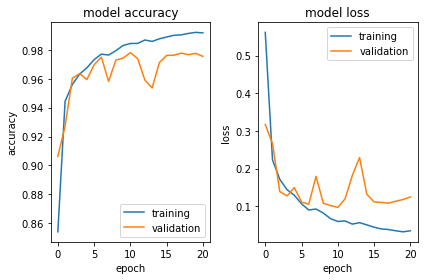

Test loss: 0.111
Test accuracy: 0.974


In [7]:
from matplotlib import pyplot as plt

figure = plt.figure()

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.tight_layout()

figure.tight_layout()
plt.tight_layout()
plt.show()

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Epoch 1/50
375/375 [==============================] - 7s 16ms/step - loss: 0.5026 - accuracy: 0.8635 - val_loss: 0.2163 - val_accuracy: 0.9417
Epoch 2/50
375/375 [==============================] - 6s 16ms/step - loss: 0.2023 - accuracy: 0.9481 - val_loss: 0.1504 - val_accuracy: 0.9572
Epoch 3/50
375/375 [==============================] - 6s 16ms/step - loss: 0.1647 - accuracy: 0.9564 - val_loss: 0.1515 - val_accuracy: 0.9591
Epoch 4/50
375/375 [==============================] - 6s 16ms/step - loss: 0.1353 - accuracy: 0.9646 - val_loss: 0.1255 - val_accuracy: 0.9656
Epoch 5/50
375/375 [==============================] - 6s 16ms/step - loss: 0.1129 - accuracy: 0.9705 - val_loss: 0.1373 - val_accuracy: 0.9645
Epoch 6/50
375/375 [==============================] - 6s 16ms/step - loss: 0.0973 - accuracy: 0.9747 - val_loss: 0.1122 - val_accuracy: 0.9712
Epoch 7/50
375/375 [==============================] - 6s 17ms/step - loss: 0.0886 - accuracy: 0.9767 - val_loss: 0.1386 - val_accuracy: 0.9704

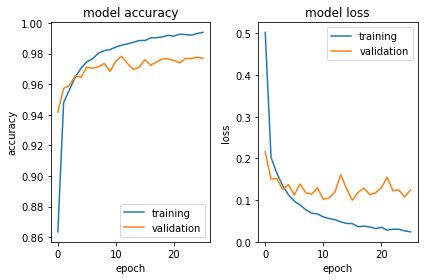

Test loss: 0.0867
Test accuracy: 0.979


In [8]:
# This model starts a bit larger and has more dropout

model = Sequential([
    Dense(units=600, activation='relu', input_shape=(image_size,)),
    
    Dense(units=500, activation='relu'),
    BatchNormalization(),
    
    Dense(units=400, activation='relu'),
    BatchNormalization(),
    
    Dense(units=300, activation='relu'),
    BatchNormalization(),
    
    Dense(units=200, activation='relu'),
    Dropout(rate=.3),
    BatchNormalization(),

    
    Dense(units=100, activation='relu'),
    Dropout(rate=.2),
    BatchNormalization(),
    
    Dense(units=50, activation='relu'),
    Dropout(rate=.1),
    BatchNormalization(),
    
    Dense(units=25, activation='relu'),
    Dropout(rate=.05),
    BatchNormalization(),
    
    
    Dense(units=num_classes, activation='softmax')
])

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Note: No validation data. In a go-to-production setting, you'd already be confident this model will generalize
# so there's no point in validating it. Instead, use all the available data to train!
early_stopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(training_data, training_labels, batch_size=128, epochs=50, validation_split=0.2, verbose=True, callbacks=[early_stopper])



figure = plt.figure()

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.tight_layout()

figure.tight_layout()
plt.tight_layout()
plt.show()

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Epoch 1/50
375/375 [==============================] - 14s 30ms/step - loss: 0.7946 - accuracy: 0.7594 - val_loss: 0.3273 - val_accuracy: 0.9211
Epoch 2/50
375/375 [==============================] - 11s 29ms/step - loss: 0.2613 - accuracy: 0.9355 - val_loss: 0.1907 - val_accuracy: 0.9517
Epoch 3/50
375/375 [==============================] - 11s 28ms/step - loss: 0.1989 - accuracy: 0.9516 - val_loss: 0.1993 - val_accuracy: 0.9524
Epoch 4/50
375/375 [==============================] - 10s 28ms/step - loss: 0.1787 - accuracy: 0.9556 - val_loss: 0.1867 - val_accuracy: 0.9549
Epoch 5/50
375/375 [==============================] - 10s 27ms/step - loss: 0.1582 - accuracy: 0.9614 - val_loss: 0.2083 - val_accuracy: 0.9513
Epoch 6/50
375/375 [==============================] - 10s 27ms/step - loss: 0.1315 - accuracy: 0.9685 - val_loss: 0.1517 - val_accuracy: 0.9644
Epoch 7/50
375/375 [==============================] - 10s 28ms/step - loss: 0.1176 - accuracy: 0.9709 - val_loss: 0.1932 - val_accuracy:

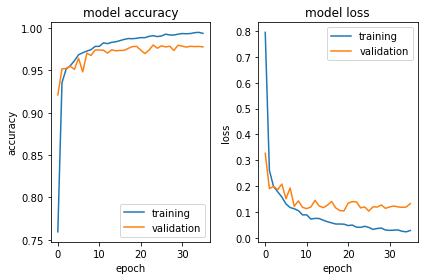

Test loss: 0.0868
Test accuracy: 0.982


In [9]:
# This model is much larger overall

model = Sequential([
    Dense(units=600, activation='relu', input_shape=(image_size,)),
    
    Dense(units=600, activation='relu'),
    BatchNormalization(),
    
    Dense(units=500, activation='relu'),
    BatchNormalization(),
    
    Dense(units=500, activation='relu'),
    BatchNormalization(),
    
    Dense(units=300, activation='relu'),
    Dropout(rate=.3),
    BatchNormalization(),
    
    Dense(units=300, activation='relu'),
    Dropout(rate=.3),
    BatchNormalization(),

    
    Dense(units=200, activation='relu'),
    Dropout(rate=.2),
    BatchNormalization(),
    
    Dense(units=200, activation='relu'),
    Dropout(rate=.2),
    BatchNormalization(),
    
    Dense(units=100, activation='relu'),
    Dropout(rate=.2),
    BatchNormalization(),
    
    Dense(units=100, activation='relu'),
    Dropout(rate=.2),
    BatchNormalization(),
    
    Dense(units=50, activation='relu'),
    Dropout(rate=.1),
    BatchNormalization(),
    
    
    Dense(units=num_classes, activation='softmax')
])

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


early_stopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(training_data, training_labels, batch_size=128, epochs=50, validation_split=0.2, verbose=True, callbacks=[early_stopper])


figure = plt.figure()

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.tight_layout()

figure.tight_layout()
plt.tight_layout()
plt.show()

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')